
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import warnings


In [3]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## indpendt and dependent features

X = df.drop("math_score" , axis=1)
y = df["math_score"]

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
## unique value in category

print("category in 'gender")
print(df["gender"].unique())

print("category in 'race_ethnicity")
print(df["race_ethnicity"].unique())

print("category in 'test_preparation_course")
print(df["test_preparation_course"].unique())

print("category in 'parental_level_of_education")
print(df["parental_level_of_education"].unique())

print("category in 'lunch")
print(df["lunch"].unique())

category in 'gender
['female' 'male']
category in 'race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
category in 'test_preparation_course
['none' 'completed']
category in 'parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
category in 'lunch
['standard' 'free/reduced']


## Column Transfer 

### Encodings


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_feature = [feature  for feature in X.columns if df[feature].dtype != 'O']
category_feature = [feature  for feature in X.columns if df[feature].dtype == 'O']

oh_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,category_feature),
        ("StandardScaler",numerical_transformer,numerical_feature)
    ]
)


In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
## train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2,random_state=42)

## model train

In [12]:
## evaluate function

def evaluate_prf(true,predicted):
    score = r2_score(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)

    return score,mae,mse,rmse
    

In [13]:
models = {
    "linearRegression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "decisionTree":DecisionTreeRegressor(),
    "randomForest":RandomForestRegressor(),
    "adaboost":AdaBoostRegressor(),
    "catboost":CatBoostRegressor(),
    "kneigbours":KNeighborsRegressor(),
    "svm":SVR(),
    "xgboost":XGBRegressor()

}

In [14]:
model_list = []
r2_list =[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ## prediction
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    ## performance  for train dataset
    model_train_score, model_train_mae, model_train_mse, model_train_rmse = evaluate_prf(y_train,y_pred_train)
    
    ## performance  for test dataset
    model_test_score, model_test_mae, model_test_mse, model_test_rmse = evaluate_prf(y_test,y_pred_test)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean square Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean square Error: {:.4f}".format(model_test_mse))

    print("- R2 Score: {:.4f}".format(model_test_score))
    r2_list.append(model_test_score)
    
    print('='*35)
    print('\n')


    

linearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- Mean square Error: 28.3349
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- Mean square Error: 29.0952
- R2 Score: 0.8804


lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean square Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- Mean square Error: 42.5064
- R2 Score: 0.8253


ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean square Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- Mean square Error: 29.0563
- R2 Score:

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,ridge,0.880593
0,linearRegression,0.880433
6,catboost,0.851632
5,adaboost,0.850774
4,randomForest,0.848166
9,xgboost,0.827797
1,lasso,0.825320
7,kneigbours,0.783813
3,decisionTree,0.752033
8,svm,0.728600


## Linear regression

In [19]:
lin_model = LinearRegression()
model = lin_model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
score = r2_score(y_test,y_pred_test)

print("r2_score is : ",score)

r2_score is :  0.8804332983749565


<Axes: xlabel='math_score'>

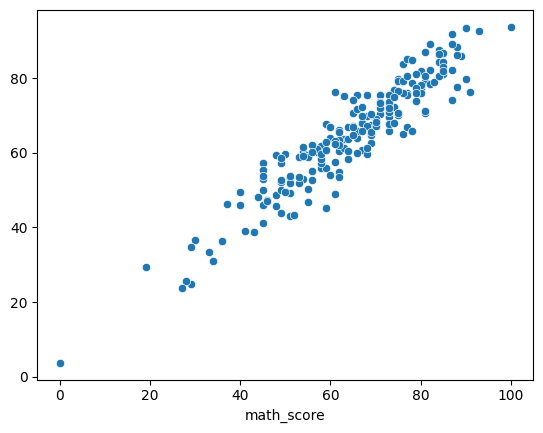

In [20]:
## graph of y_test and y_pred_test

sns.scatterplot(x = y_test,y = y_pred_test)

<Axes: xlabel='math_score'>

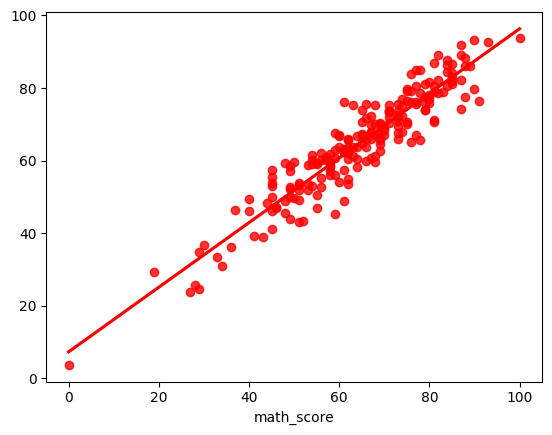

In [22]:
sns.regplot(x = y_test , y = y_pred_test ,ci=None, color="red")

## differnece b/w actual and predicted values

In [23]:
pd.DataFrame({"actual_vale":y_test,"predicted":y_pred_test,"difference":y_test - y_pred_test})

,actual_vale,predicted,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
